## Personalized Medicine Recommending System
##-Haree J
## Code Clause Internship

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/Gmed.csv')

In [ ]:
data.head()

,Drug_Name,Reason,Description
0,A CN Gel(Topical) 20gmA CN Soap 75gm,Acne,Mild to moderate acne (spots)
1,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,Acne,A RET 0.025% is a prescription medicine that i...
2,ACGEL CL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
3,ACGEL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
4,Acleen 1% Lotion 25ml,Acne,treat the most severe form of acne (nodular ac...


In [ ]:
data.shape

(22481, 3)

In [ ]:
data.isna().sum()

Drug_Name       0
Reason          0
Description    14
dtype: int64

In [ ]:
data.dropna(subset=['Description'], inplace=True)

In [ ]:
data.describe()

,Drug_Name,Reason,Description
count,22467,22467,22467
unique,22465,51,300
top,Gefer Capsule 10'S,Supplement,"treat type 2 diabetes mellitus when diet, phys..."
freq,2,3913,671


In [ ]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22476    False
22477    False
22478    False
22479    False
22480    False
Length: 22467, dtype: bool

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22467 entries, 0 to 22480
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Drug_Name    22467 non-null  object
 1   Reason       22467 non-null  object
 2   Description  22467 non-null  object
dtypes: object(3)
memory usage: 702.1+ KB
None


In [ ]:
data['Reason'].value_counts().shape

(51,)

In [ ]:
count = data['Reason'].value_counts()
count

Supplement           3913
Pain                 2852
Infection            2629
Hypertension         2505
Diabetes             2013
Fungal                878
Allergies             851
Depression            628
Anxiety               502
Anaemia               490
Acne                  394
Angina                327
Psychosis             301
Constipation          289
Viral                 287
Diarrhoea             263
General               243
Malarial              228
Schizophrenia         217
Glaucoma              197
Arthritis             178
Vaccines              167
Fever                 157
Pyrexia               141
Hypnosis              129
Alzheimer             123
Osteoporosis          123
Hyperpigmentation     122
Vertigo               119
Digestion             117
Migraine              113
Parkinson             108
Gout                  107
Contraception          96
Haematopoiesis         79
Haemorrhoid            75
Wound                  72
Appetite               67
Dandruff    

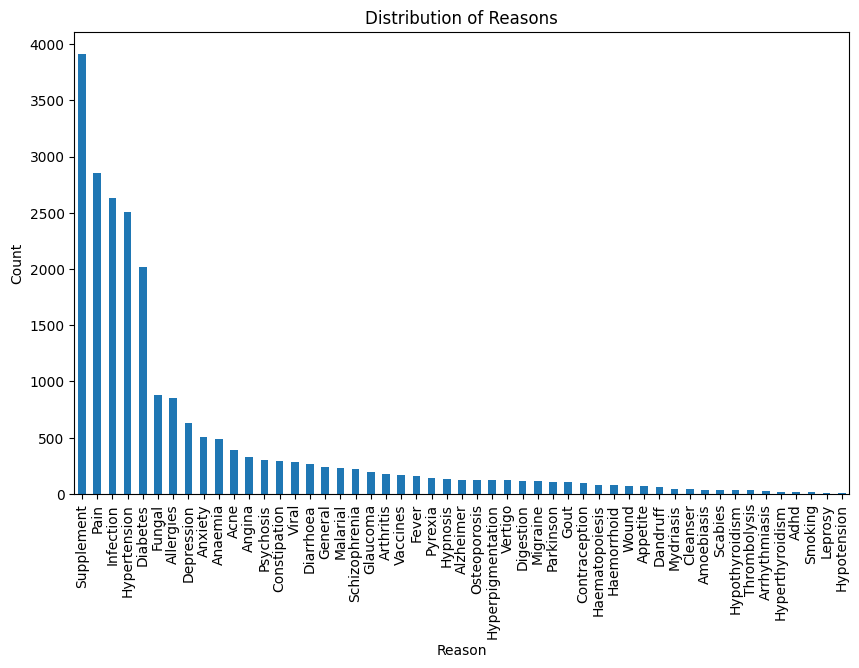

In [ ]:
count.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Reason')
plt.ylabel('Count')
plt.title('Distribution of Reasons')
plt.show()

In [ ]:
threshold = 200

# Identify values that fall below the threshold
values_above_threshold = count[count >= threshold]
values_below_threshold = count[count < threshold]

# Create a list of values to keep (including 'Other' category)
values_to_keep = list(values_above_threshold.index) + ['Other']

# Filter the original DataFrame based on the values to keep
filtered_data = data[data['Reason'].isin(values_to_keep)]

# Display the shape of the filtered DataFrame
print(filtered_data.shape)

(19810, 3)


In [ ]:
filtered_data.shape

(19810, 3)

In [ ]:
filtered_data.head()

,Drug_Name,Reason,Description
0,A CN Gel(Topical) 20gmA CN Soap 75gm,Acne,Mild to moderate acne (spots)
1,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,Acne,A RET 0.025% is a prescription medicine that i...
2,ACGEL CL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
3,ACGEL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
4,Acleen 1% Lotion 25ml,Acne,treat the most severe form of acne (nodular ac...


In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
# Load NLTK stopwords and initialize lemmatizer and stemmer
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Tokenize the text
    tokens = text.split()
    # Remove stopwords, lemmatize, and stem

    tokens = [stemmer.stem(lemmatizer.lemmatize(token)) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

filtered_data['Description'] = filtered_data['Description'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-20-f3801d5a62da>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Description'] = filtered_data['Description'].apply(preprocess_text)


In [ ]:
filtered_data.head()

,Drug_Name,Reason,Description
0,A CN Gel(Topical) 20gmA CN Soap 75gm,Acne,mild moder acn spot
1,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,Acne,ret 0025 prescript medicin use reduc fine wrinkl
2,ACGEL CL NANO Gel 15gm,Acne,use treat acn vulgari peopl 12 year age older ...
3,ACGEL NANO Gel 15gm,Acne,use treat acn vulgari peopl 12 year age older ...
4,Acleen 1% Lotion 25ml,Acne,treat sever form acn nodular acn


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import math

# sublinear_tf = 1 + log(tf)

# Initialize TF-IDF vectorizer with adjustments
tfidf_vectorizer = TfidfVectorizer(
    stop_words='english',
    sublinear_tf=True,  # Apply sublinear TF scaling
    smooth_idf=True     # Apply IDF smoothing
)

# Fit and transform the description data

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_data['Reason'] + " " + filtered_data['Description'])

In [ ]:
def recommend_drug(user_reason, user_description):
    # Preprocess and transform user input
    user_input_tfidf = tfidf_vectorizer.transform([user_reason + " " + user_description])

    # Calculate cosine similarity between user input and existing reasons + descriptions
    similarity_scores = cosine_similarity(user_input_tfidf, tfidf_matrix).flatten()

    # Find the index of the most similar reason + description
    most_similar_index = similarity_scores.argmax()

    # Get the recommended drug name
    recommended_drug = filtered_data.loc[most_similar_index, 'Drug_Name']

    return recommended_drug

# Get user input for reason and description
user_reason = input("Enter a reason: ")
user_description = input("Enter a description: ")

# Get the recommended drug and print it
recommended_drug = recommend_drug(user_reason, user_description)
print(f"Recommended Drug: {recommended_drug} ")

Enter a reason: 
Enter a description: 
Recommended Drug: A CN Gel(Topical) 20gmA CN Soap 75gm 


In [ ]:
filtered_data['Description'].duplicated().shape

(19810,)

In [ ]:
filtered_data['Description'].unique().shape

(176,)

In [ ]:
filtered_data['Description'].shape

(19810,)

In [ ]:
import pandas as pd

htip = {
    'Topic': [],
    'Tip': []
}

Supplement = [
    "Consult a healthcare professional before starting any new supplements to ensure they're appropriate for your individual needs.",
    "Research and choose supplements from reputable brands with good reviews and third-party testing.",
    "Follow the recommended dosage instructions to avoid overconsumption and potential side effects.",
    "Monitor your body's response to the supplements and adjust as needed based on your health goals.",
    "Be patient and consistent – supplements may take time to show noticeable effects."
]

Pain = [
    "Identify the underlying cause of your pain through a medical evaluation to receive proper treatment.",
    "Consider using over-the-counter pain relievers under the guidance of a healthcare provider.",
    "Apply heat or cold therapy to the affected area as recommended by a medical professional.",
    "Explore alternative therapies such as physical therapy, acupuncture, or massage to alleviate pain.",
    "Practice relaxation techniques, such as deep breathing and mindfulness, to manage chronic pain."
]


Infection = [
    "Practice good hygiene, including regular handwashing, to prevent the spread of infections.",
    "Finish prescribed antibiotics even if symptoms improve to prevent antibiotic resistance.",
    "Stay hydrated, eat nutritious foods, and get enough rest to support your immune system.",
    "Avoid close contact with infected individuals and public spaces during outbreaks.",
    "Consider vaccinations to protect against common infections, as recommended by healthcare professionals."
]

Hypertension = [
    "Monitor your blood pressure regularly and work with your doctor to set healthy targets.",
    "Adopt a heart-healthy diet rich in fruits, vegetables, whole grains, lean proteins, and low-fat dairy.",
    "Engage in regular physical activity, such as brisk walking, swimming, or cycling, to maintain a healthy weight.",
    "Limit sodium intake, avoid processed foods, and choose low-sodium options when dining out.",
    "Manage stress through relaxation techniques, meditation, and hobbies you enjoy."
]

Diabetes = [
    "Follow a balanced diet with controlled carbohydrate intake to manage blood sugar levels.",
    "Monitor blood sugar levels regularly and take medications as prescribed by your doctor.",
    "Engage in regular physical activity to improve insulin sensitivity and overall health.",
    "Educate yourself about diabetes management, including potential complications and warning signs.",
    "Maintain regular check-ups with your healthcare team to track your progress and make necessary adjustments."
]

Acne = [
    "Maintain a Consistent Skincare Routine: Cleanse your face twice daily with a gentle cleanser to remove excess oil and dirt. Use non-comedogenic (non-pore-clogging) products and avoid harsh scrubs that can irritate the skin.",
    "Avoid Touching or Picking: Refrain from touching your face frequently and avoid picking or squeezing pimples, as this can worsen inflammation and lead to scarring.",
    "Use Oil-Free and Non-Comedogenic Products: Choose oil-free makeup, moisturizers, and sunscreen labeled as non-comedogenic to prevent clogged pores and breakouts.",
    "Stay Hydrated and Eat a Balanced Diet: Drink plenty of water and consume a diet rich in fruits, vegetables, whole grains, and lean proteins. Limit dairy and high-glycemic foods that may contribute to acne.",
    "Consult a Dermatologist: If over-the-counter treatments aren't effective, consider seeking advice from a dermatologist. They can recommend prescription medications or therapies tailored to your specific acne type and severity."
]

General_health = [
    "Prioritize regular physical activity to maintain overall health and well-being.",
    "Stay hydrated by drinking plenty of water throughout the day.",
    "Follow a balanced diet that includes a variety of nutrient-rich foods.",
    "Get enough sleep to support your body's natural healing and rejuvenation.",
    "Practice stress-reduction techniques, such as deep breathing, meditation, or yoga, to improve mental and emotional health.",
    "Avoid smoking and limit alcohol consumption to promote better health outcomes.",
    "Stay up-to-date with recommended vaccinations and screenings to prevent illness.",
    "Maintain a positive outlook and engage in activities that bring joy and fulfillment to your life.",
    "Build a strong support network of friends, family, and healthcare professionals to help you navigate health challenges.",
    "Listen to your body and seek medical attention if you experience persistent symptoms or concerns."
]


In [ ]:
a = {"Acne"}
for h in htip['Topic']:
    a.add(h)
a
b= list(a)
b

['Acne']

In [7]:
import random

tips_dict =  {
"Supplement" :[
    "Consult a healthcare professional before starting any new supplements to ensure they're appropriate for your individual needs.",
    "Research and choose supplements from reputable brands with good reviews and third-party testing.",
    "Follow the recommended dosage instructions to avoid overconsumption and potential side effects.",
    "Monitor your body's response to the supplements and adjust as needed based on your health goals.",
    "Be patient and consistent – supplements may take time to show noticeable effects."
],

"Pain" :[
    "Identify the underlying cause of your pain through a medical evaluation to receive proper treatment.",
    "Consider using over-the-counter pain relievers under the guidance of a healthcare provider.",
    "Apply heat or cold therapy to the affected area as recommended by a medical professional.",
    "Explore alternative therapies such as physical therapy, acupuncture, or massage to alleviate pain.",
    "Practice relaxation techniques, such as deep breathing and mindfulness, to manage chronic pain."
],


"Infection" :[
    "Practice good hygiene, including regular handwashing, to prevent the spread of infections.",
    "Finish prescribed antibiotics even if symptoms improve to prevent antibiotic resistance.",
    "Stay hydrated, eat nutritious foods, and get enough rest to support your immune system.",
    "Avoid close contact with infected individuals and public spaces during outbreaks.",
    "Consider vaccinations to protect against common infections, as recommended by healthcare professionals."
],

"Hypertension" : [
    "Monitor your blood pressure regularly and work with your doctor to set healthy targets.",
    "Adopt a heart-healthy diet rich in fruits, vegetables, whole grains, lean proteins, and low-fat dairy.",
    "Engage in regular physical activity, such as brisk walking, swimming, or cycling, to maintain a healthy weight.",
    "Limit sodium intake, avoid processed foods, and choose low-sodium options when dining out.",
    "Manage stress through relaxation techniques, meditation, and hobbies you enjoy."
],

"Diabetes" : [
    "Follow a balanced diet with controlled carbohydrate intake to manage blood sugar levels.",
    "Monitor blood sugar levels regularly and take medications as prescribed by your doctor.",
    "Engage in regular physical activity to improve insulin sensitivity and overall health.",
    "Educate yourself about diabetes management, including potential complications and warning signs.",
    "Maintain regular check-ups with your healthcare team to track your progress and make necessary adjustments."
],

"Acne" : [
    "Maintain a Consistent Skincare Routine: Cleanse your face twice daily with a gentle cleanser to remove excess oil and dirt. Use non-comedogenic (non-pore-clogging) products and avoid harsh scrubs that can irritate the skin.",
    "Avoid Touching or Picking: Refrain from touching your face frequently and avoid picking or squeezing pimples, as this can worsen inflammation and lead to scarring.",
    "Use Oil-Free and Non-Comedogenic Products: Choose oil-free makeup, moisturizers, and sunscreen labeled as non-comedogenic to prevent clogged pores and breakouts.",
    "Stay Hydrated and Eat a Balanced Diet: Drink plenty of water and consume a diet rich in fruits, vegetables, whole grains, and lean proteins. Limit dairy and high-glycemic foods that may contribute to acne.",
    "Consult a Dermatologist: If over-the-counter treatments aren't effective, consider seeking advice from a dermatologist. They can recommend prescription medications or therapies tailored to your specific acne type and severity."
],

"General_health" : [
    "Prioritize regular physical activity to maintain overall health and well-being.",
    "Stay hydrated by drinking plenty of water throughout the day.",
    "Follow a balanced diet that includes a variety of nutrient-rich foods.",
    "Get enough sleep to support your body's natural healing and rejuvenation.",
    "Practice stress-reduction techniques, such as deep breathing, meditation, or yoga, to improve mental and emotional health.",
    "Avoid smoking and limit alcohol consumption to promote better health outcomes.",
    "Stay up-to-date with recommended vaccinations and screenings to prevent illness.",
    "Maintain a positive outlook and engage in activities that bring joy and fulfillment to your life.",
    "Build a strong support network of friends, family, and healthcare professionals to help you navigate health challenges.",
    "Listen to your body and seek medical attention if you experience persistent symptoms or concerns."
]
}
user_reason = input("Enter a reason/topic: ")

if user_reason in tips_dict:
    random_tip = random.choice(tips_dict[user_reason])
    print(f"Random Tip for {user_reason}:")
    print("- " + random_tip)
else:
    print("No tips available for the entered reason/topic.")


Enter a reason/topic: Acne
Random Tip for Acne:
- Maintain a Consistent Skincare Routine: Cleanse your face twice daily with a gentle cleanser to remove excess oil and dirt. Use non-comedogenic (non-pore-clogging) products and avoid harsh scrubs that can irritate the skin.


In [8]:
import random
def validate_user_input(user_reason, user_description):
    # Basic validation for user input
    if not user_reason:
        raise ValueError("Reason cannot be empty.")
    if not user_description:
        raise ValueError("Description cannot be empty.")

    # Add more validation criteria if needed

    return user_reason, user_description

def recommend_drug(user_reason, user_description):
    # Preprocess and transform user input
    user_input_tfidf = tfidf_vectorizer.transform([user_reason + " " + user_description])

    # Calculate cosine similarity between user input and existing reasons + descriptions
    similarity_scores = cosine_similarity(user_input_tfidf, tfidf_matrix).flatten()

    # Find the index of the most similar reason + description
    most_similar_index = similarity_scores.argmax()

    # Get the recommended drug name
    recommended_drug = filtered_data.loc[most_similar_index, 'Drug_Name1']

    return recommended_drug

# Get user input for reason and description with validation
user_reason = input("Enter a reason: ")
user_description = input("Enter a description: ")




try:
    validated_reason, validated_description = validate_user_input(user_reason, user_description)
    recommended_drug = recommend_drug(validated_reason, validated_description)

    if recommended_drug[-1] == ",":
        print(f"Recommended Drug: {recommended_drug[:-1]}")
    else:
        print(f"Recommended Drug: {recommended_drug}")

except ValueError as e:
    print("Validation Error:", e)


if user_reason in tips_dict:
    random_tip = random.choice(tips_dict[user_reason])
    print(f"Random Tip for {user_reason}:")
    print("- " + random_tip)
else:
    random_tip = random.choice(tips_dict["General_health"])
    print(f"Random Tip for Health:")
    print("- " + random_tip)




Enter a reason: Acne
Enter a description: 
Validation Error: Description cannot be empty.
Random Tip for Acne:
- Use Oil-Free and Non-Comedogenic Products: Choose oil-free makeup, moisturizers, and sunscreen labeled as non-comedogenic to prevent clogged pores and breakouts.
